In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report

In [2]:
from utilities import visualize_classifier

In [3]:
# Using the choice of random forests or extended random forests
classifier_type='rf' #'rf' or 'erf'

In [4]:
input_file = 'data_random_forests.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [5]:
data

array([[5.88, 6.2 , 0.  ],
       [5.7 , 3.59, 1.  ],
       [3.42, 4.47, 2.  ],
       ...,
       [6.11, 4.65, 0.  ],
       [7.57, 3.97, 1.  ],
       [3.89, 4.13, 2.  ]])

In [6]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])
class_2 = np.array(X[y==2])

Text(0.5, 1.0, 'Input data')

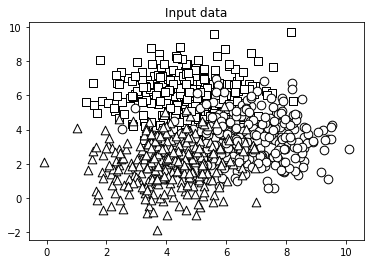

In [7]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white',edgecolors='black', linewidth=1, marker='s')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',edgecolors='black', linewidth=1, marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white',edgecolors='black', linewidth=1, marker='^')
plt.title('Input data')

In [8]:
# Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [10]:
X_train.shape, y_train.shape

((675, 2), (675,))

In [11]:
# Ensemble Learning classifier
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if classifier_type == 'rf':
    classifier = RandomForestClassifier(**params)
else:
    classifier = ExtraTreesClassifier(**params)

In [12]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

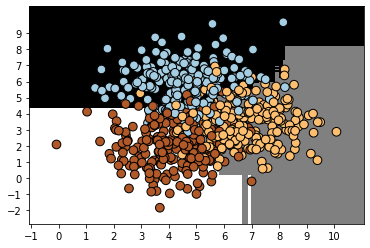

In [14]:
visualize_classifier(classifier, X_train, y_train)

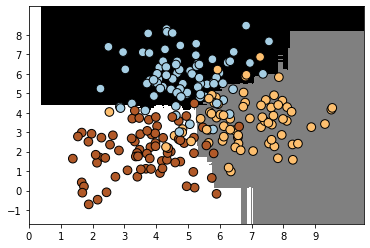

In [16]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test)

In [17]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1', 'Class-2']

In [18]:
# Evaluate classifier performance
print("\n" + "#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################



In [19]:
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")

plt.show()

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

########################################

